In [1]:
import pandas as pd
import numpy as np

# Load the Dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("First 5 rows of data:")
display(df.head())

print("\nData Info:")
df.info()

First 5 rows of data:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Data Info:
<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    

In [2]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")
df.dropna(subset=['TotalCharges'], inplace=True)

customer_ids = df['customerID']
df.drop(columns=['customerID'], inplace=True)

print("Columns left for traning:")
print(df.columns.tolist())


Columns left for traning:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


/tmp/ipykernel_123487/873621962.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, ax=axes[0], palette="pastel")


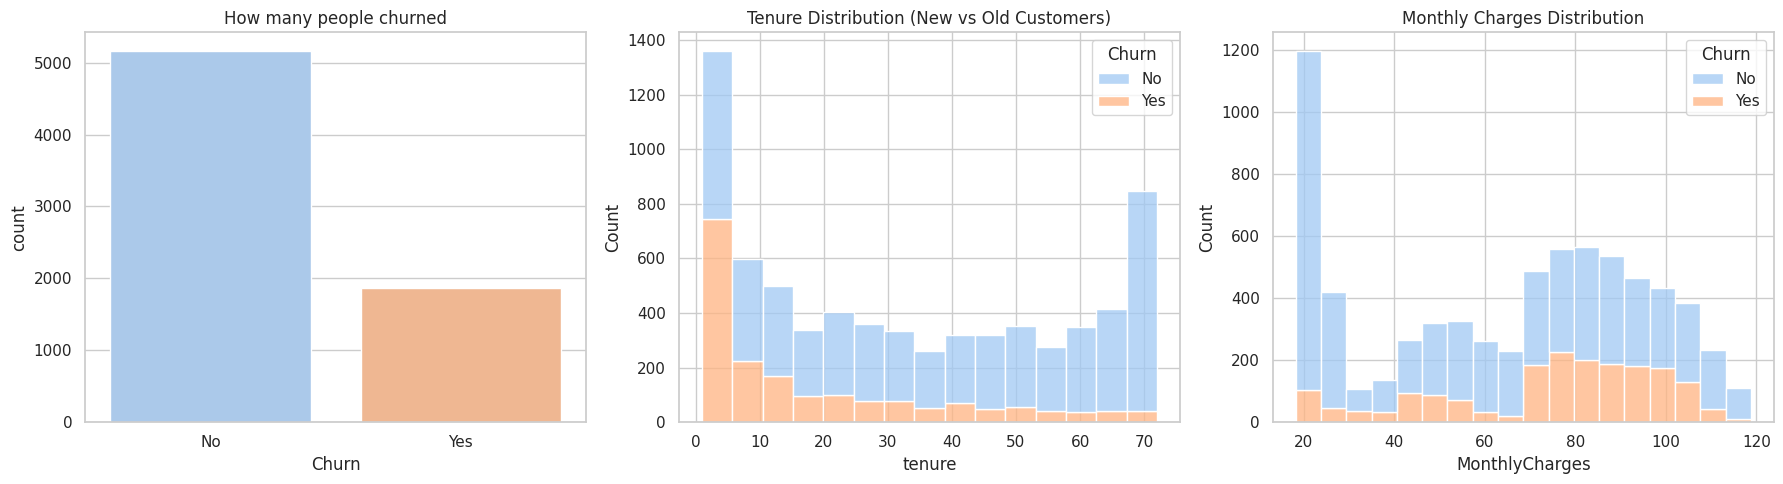

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# figure with 3 subplots
fig, axes = plt.subplots(1,3, figsize=(18, 5))

#Overall Churn Distribution
sns.countplot(x='Churn', data=df, ax=axes[0], palette="pastel")
axes[0].set_title('How many people churned')

#Tenure distribution by churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', ax=axes[1], palette="pastel" )
axes[1].set_title('Tenure Distribution (New vs Old Customers)')

#Monthly charges distribution by churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', ax=axes[2], palette="pastel")
axes[2].set_title('Monthly Charges Distribution')

plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

#Converting churn to yes:1 and no:0
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

#Converting all other data to numeric values
df_encoded = pd.get_dummies(df, drop_first=True)

# Setting features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

#Spliiting data (80-20)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("Data successfully split!")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Data successfully split!
Training Data Shape: (5625, 30)
Testing Data Shape: (1407, 30)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and training the model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# making predictions  
y_pred = model_lr.predict(X_test)

# performancce evaluation
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2%}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 78.75%

Confusion Matrix:
[[915 118]
 [181 193]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



/home/guru/Projects/Telco-Churn/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# initializing and training xgboost
model_xbg_tuned = XGBClassifier(
    n_estimators = 100, 
    learning_rate = 0.05, 
    max_depth = 3,
    subsample = 0.8,
    eval_metric = 'logloss',
    use_label_encoder = False,
    random_state = 42
)
model_xbg_tuned.fit(X_train, y_train)

#prediction
y_pred_tuned = model_xbg_tuned.predict(X_test)

#results
print("--- XGBoost Results ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_tuned):.2%}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

[23:39:13] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.



--- XGBoost Results ---
Accuracy Score: 79.18%

Confusion Matrix:
[[934  99]
 [194 180]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



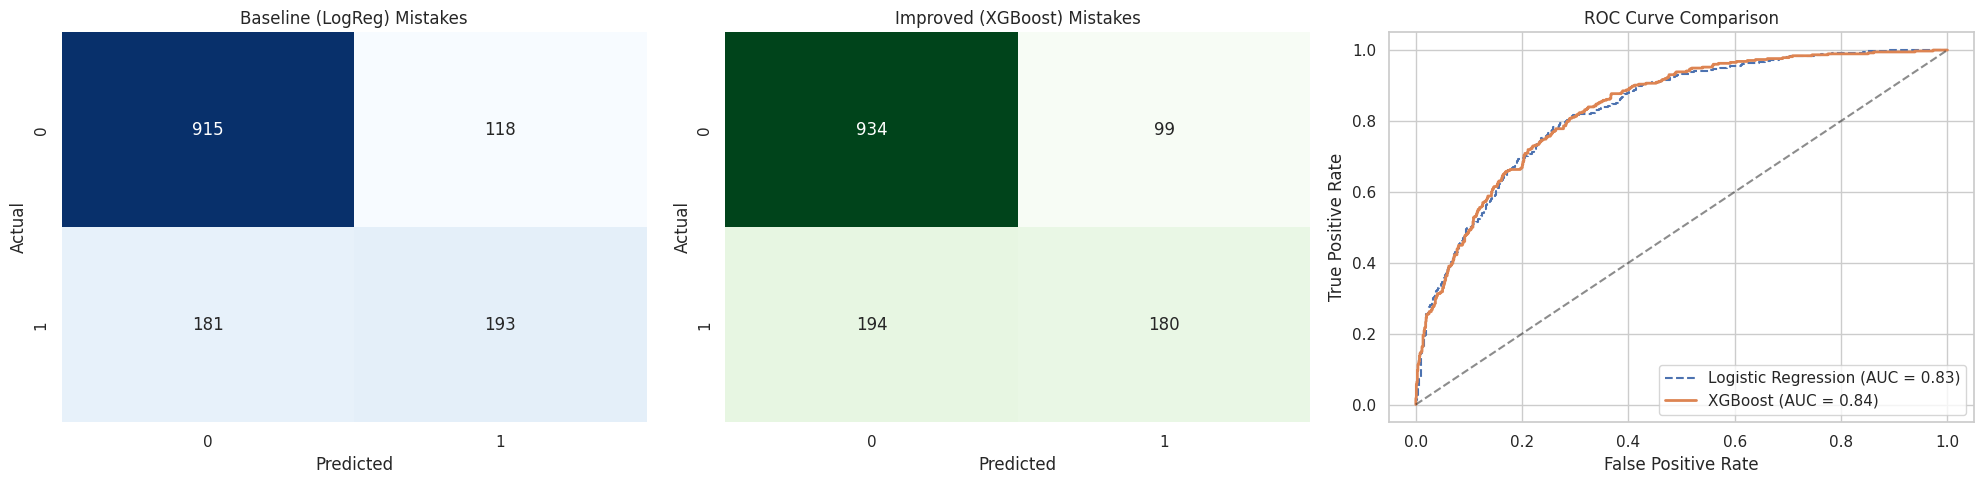


--- Final Model Comparison Table ---
              Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
Logistic Regression    0.7875     0.6206  0.5160    0.5635   0.8321
    XGBoost (Tuned)    0.7918     0.6452  0.4813    0.5513   0.8355


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# getting all metrics
def get_metrics(y_true, y_pred, y_prob, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_prob)
    }

# Get probabilities for ROC curve
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
y_prob_xgb = model_xbg_tuned.predict_proba(X_test)[:, 1]

# Creating the Comparison Table
metrics_lr = get_metrics(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
metrics_xgb = get_metrics(y_test, y_pred_xgb, y_prob_xgb, "XGBoost (Tuned)")
df_compare = pd.DataFrame([metrics_lr, metrics_xgb])

# Plotting 
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot A: Confusion Matrix (Baseline)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('Baseline (LogReg) Mistakes')
axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('Actual')

# Plot B: Confusion Matrix (Improved)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=False)
axes[1].set_title('Improved (XGBoost) Mistakes')
axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('Actual')

# Plot C: ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

axes[2].plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {metrics_lr["AUC-ROC"]:.2f})', linestyle='--')
axes[2].plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {metrics_xgb["AUC-ROC"]:.2f})', linewidth=2)
axes[2].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[2].set_title('ROC Curve Comparison')
axes[2].set_xlabel('False Positive Rate'); axes[2].set_ylabel('True Positive Rate')
axes[2].legend()

plt.tight_layout()
plt.show()

# Final Table
print("\n--- Final Model Comparison Table ---")
print(df_compare.round(4).to_string(index=False))

In [12]:
import joblib

#saving the xgboost model and feature names
joblib.dump(model_xbg_tuned, 'churn_model.pkl')
joblib.dump(X.columns, 'model_features.pkl')

print("Model and Feature names saved")

Model and Feature names saved
